In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_selection import chi2, f_regression, SelectKBest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve,precision_score, roc_auc_score
from xgboost import XGBClassifier
from imblearn.over_sampling import ADASYN, SMOTE
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df = pd.read_csv('application_data_cleanest.csv', index_col=0)

In [3]:
columns = df.columns

In [4]:
X = df[columns[:-1]]
y = df[columns[-1]]

In [5]:
np.abs(df.corr().TARGET).sort_values(ascending=False).head(26)

TARGET                                               1.000000
EXT_SOURCE_2                                         0.160303
EXT_SOURCE_3                                         0.157397
DAYS_BIRTH                                           0.078239
DAYS_EMPLOYED                                        0.070075
REGION_RATING_CLIENT_W_CITY                          0.060893
REGION_RATING_CLIENT                                 0.058899
NAME_INCOME_TYPE_Working                             0.057481
NAME_EDUCATION_TYPE_Higher education                 0.056593
DAYS_LAST_PHONE_CHANGE                               0.055218
CODE_GENDER_M                                        0.054713
CODE_GENDER_F                                        0.054704
DAYS_ID_PUBLISH                                      0.051457
REG_CITY_NOT_WORK_CITY                               0.050994
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
NAME_INCOME_TYPE_Pensioner                           0.046209
ORGANIZA

In [6]:
fs=SelectKBest(f_regression, k = 25)

In [7]:
fs.fit(X,y)

SelectKBest(k=25, score_func=<function f_regression at 0x00000214FB1FFB80>)

In [8]:
features = X.columns[fs.get_support()]
features

Index(['CODE_GENDER_F', 'CODE_GENDER_M', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'ORGANIZATION_TYPE_NA', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_3'],
      dtype='object')

In [9]:
X=X[features]

In [10]:
X

,CODE_GENDER_F,CODE_GENDER_M,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,ORGANIZATION_TYPE_NA,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.507465,-0.149452,1.506880,...,-1.317463,-2.129249e+00,4.163149,5.253007,-0.206991,1,0,0,0,1
100003.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.600698,-1.252750,-0.166821,...,0.565106,2.138178e-13,-0.321603,-0.276616,0.163108,1,0,0,0,1
100004.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-1.092389,-0.783451,-0.689509,...,0.217545,1.253633e+00,-0.321603,-0.276616,0.178831,1,0,0,0,0
100006.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.653696,-0.928991,-0.680114,...,0.712841,2.138178e-13,-0.321603,-0.276616,0.418307,1,0,0,0,1
100007.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.068772,0.563570,-0.892535,...,-1.004190,2.138178e-13,-0.321603,-0.276616,-0.173126,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.848671,0.845396,1.537586,...,0.876267,2.138178e-13,-0.321603,-0.276616,0.834366,1,0,0,0,0
456252.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,-0.848671,0.310593,-1.085707,...,-2.087455,2.138178e-13,-0.321603,-0.276616,1.164553,0,0,0,0,1
456253.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.126202,-1.147120,0.245417,...,0.111756,-1.673663e+00,-0.321603,-0.276616,-1.144333,1,0,1,1,1


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
logreg = LogisticRegression(max_iter=500, n_jobs= 8)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=500, n_jobs=8)

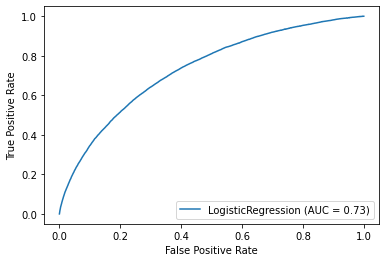

In [13]:
plot_roc_curve(logreg, X_train, y_train)

In [14]:
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [15]:
rc = RidgeClassifier()
rc.fit(X_train, y_train)

RidgeClassifier()

In [16]:
sgd = SGDClassifier(n_jobs=8)
sgd.fit(X_train, y_train)

SGDClassifier(n_jobs=8)

In [17]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [18]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [20]:
rf = RandomForestClassifier(n_jobs=8)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=8)

In [21]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

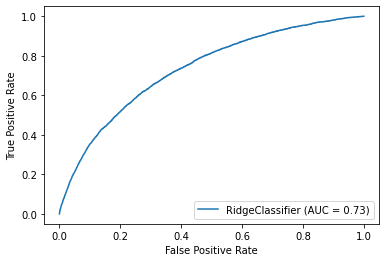

In [31]:
plot_roc_curve(rc, X_test, y_test)

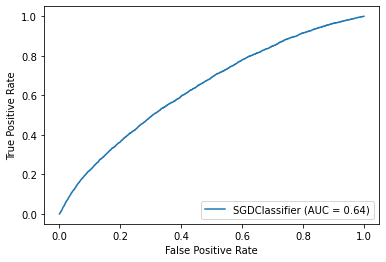

In [23]:
plot_roc_curve(sgd, X_test, y_test)

In [ ]:
print(sgd.score(X_train, y_train))
print(sgd.score(X_test, y_test))

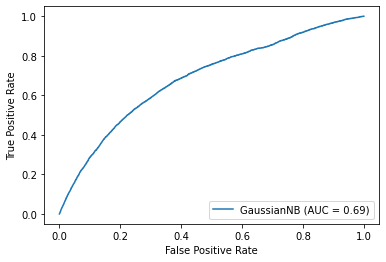

In [24]:
plot_roc_curve(nb, X_test, y_test)

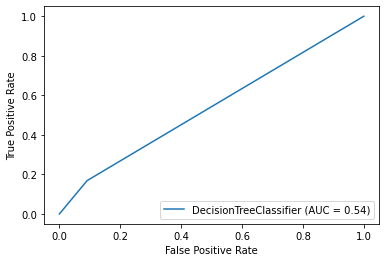

In [25]:
plot_roc_curve(dt, X_test, y_test)

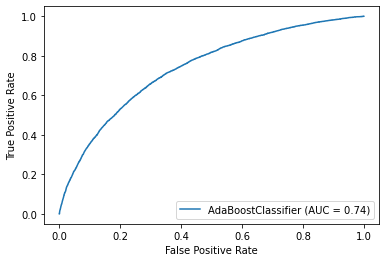

In [26]:
plot_roc_curve(ada, X_test, y_test)

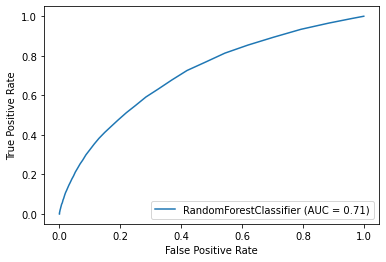

In [27]:
plot_roc_curve(rf, X_test, y_test)

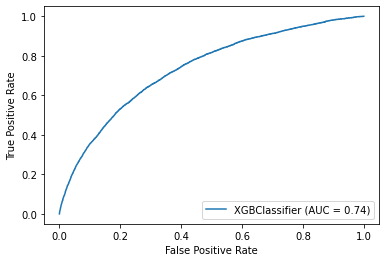

In [28]:
plot_roc_curve(xgb, X_test, y_test)